## <h1><center>Lead Scoring - Group Case Study</center></h1>
#### <div style="text-align: left"> Mukundan A P & Anindo Mazumdar </div>  <div style="text-align: right"> 26th August 2019 </div>

Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engine.Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.The company requires to build a model wherein it need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### DATA UNDERSTANDING & CLEANSING
#### We start off by Importing libraries to be used for project

In [1]:
# Importing Data analysis,excel reading and visualization related packages

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import os # Importing for showing details/changing present working directory
pd.set_option('display.max_columns', 500) # changing output display settings for columns
pd.set_option('display.max_rows', 500) # chaning output display setting for rows

# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generic function to create labels over bar plot
def create_label(ax,type_of_label):
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 0
        # Vertical alignment for positive values
        va = 'bottom'
    
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
    
        # Use Y value as label and format number with two decimal places
        if type_of_label == 'integer':
            y_value = int(y_value)
            label = "{}".format(y_value)
        else:
            label = "{:.2f}".format(y_value)
    
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Function to modify bar width of seaborn plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## Importing the Dataset 

#### Please note that for this exercise, the "Leads.csv"  file is placed under downloads folder on the local machine. 
#### For executing the following commands successfully, please place the files in any folder and change the present working directory to that folder using chdir command

In [3]:
# Changing directory to where files are placed
os.chdir("C:\\Users\\Mukund\\Python\\GCS_1_Lead Scoring Case Study\\Lead Scoring Assignment")

In [4]:
# Importing the Leads dataset

leaddf = pd.read_csv("Leads.csv")

In [5]:
# We'll try observing the rows & column entires from the Leads dataset by fetching few rows

leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### We observe that a few columns have values called `'Select'` by default(Columns like - Lead Profile, City etc.)
#### This most likely ties to the fact that this would be a non- mandatory field while filling up the questionnaire ( a drop down)  , the default value of which would be `'Select'`.
#### While filling up the form by a prospective lead / updating entires related with a lead by sales team,if the user hasn't filled the relevant details of a non mandatory column/  information is not available to sales team to update, they would keep it as blank, which in this case is marked as `'Select'`. Hence we'll treat all the `'Select'` values as `NaN` values.


#### Next we'll import the Data Dictionary as well for our reference

In [6]:
# Importing the Dictionary(Note - Here we have saved the xlsx file to csv file before importing)

Dictionary = pd.read_csv("Leads Data Dictionary.csv")

In [7]:
# Observing the Column Names and Descriptions annoted in the Dictionary
Dictionary

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


## DATA ANALYSIS & CLEANSING
#### Next step would be  Data Analysis and cleansing :

In [8]:
# Here we have read the file again, but makred 'Select' values as NaN
leaddf = pd.read_csv('Leads.csv',na_values='Select')
leaddf.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Reviewing the shape of the dataframe .
leaddf.shape
# There are 9240 rows and 37 columns in the original dataframe

(9240, 37)

In [10]:
# Next well used the Describe function to analyse the numeric fields
leaddf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# Looking at the data structure of each of the columns
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [12]:
# Next we'll review the data frame for null values
leaddf.isnull().values.any()
#Note - Clearly calls out presence of null values

True

In [13]:
# Next we'll get a sense of null values by column 
leaddf.isnull().sum()
#Note - We could see significant number of null values. Data correction steps are needed before building the model

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# Looking at the numbers for null values as a percentage of total entires in the column

leaddf.isnull().sum()*100/leaddf.shape[0]


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
# Next we'll get a sense of null values by count 
leaddf.isnull().sum().reset_index().rename({0:'Number of NaN values'},axis=1).sort_values('Number of NaN values',ascending=False)

,index,Number of NaN values
13,How did you hear about X Education,7250
28,Lead Profile,6855
25,Lead Quality,4767
33,Asymmetrique Profile Score,4218
32,Asymmetrique Activity Score,4218
30,Asymmetrique Activity Index,4218
31,Asymmetrique Profile Index,4218
29,City,3669
12,Specialization,3380
24,Tags,3353


In [16]:
# Percentage of missing values column-wise
round(leaddf.isnull().sum()/len(leaddf.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
leaddf.shape

(9240, 37)

#### We observe that a few columns have large extent of null values( Ex- Specialization, Asymmetric Activity Index, Lead Profile etc)

#### Hence we start our exercise by removing columns with more than 30% values as null, as there's no way to impute missing values in such cases

In [18]:
# Drop irrelevant columns with more than 30% null values
columns_to_drop = ['Specialization','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'\
               ,'How did you hear about X Education','Lead Profile','City','Tags']
leaddf = leaddf.drop(columns_to_drop,axis=1)
leaddf.shape

(9240, 27)

In [19]:
# Looking at the null values by column again
round(leaddf.isnull().sum()/len(leaddf.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## DATA PREPARATION
#### Next step in our analysis would be Data Preparation

In [20]:
# list all columns for reference before proceeding with data prep
DataFrame_Leads=leaddf
DataFrame_Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
# Looking at various values for column 'County'
leaddf['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
China                      2
Ghana                      2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Uganda                     2
Belgium                    2
Italy                      2
Philippines                2
Russia                     1
Denmark                    1
Indonesia                  1
Kenya                      1
Malaysia                   1
Switzerland                1
Tanzania      

In [22]:
# Looking at columns 'County' and 'Converted' as a group to get further breakdown
leaddf.groupby(['Country','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Country,Converted,Count
19,India,0,4091
20,India,1,2401
52,United States,0,51
48,United Arab Emirates,0,33
49,United Arab Emirates,1,20
53,United States,1,18
36,Saudi Arabia,0,17
38,Singapore,0,13
39,Singapore,1,11
2,Australia,0,10


`Observations` = Maximum leads are from country India (6,492)

In [23]:
# Since we have values predominantly centered around one Value (i.e. India) , we can drop the above column 
leaddf = leaddf.drop('Country',axis=1)
leaddf.shape

(9240, 26)

In [24]:
# Now analyzing column ' What matters most to you in choosing a course'
leaddf['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Since again we observe that most of the values are centered around a single option i.e Better Career Prospects, we'll drop this column
leaddf = leaddf.drop('What matters most to you in choosing a course',axis=1)
leaddf.shape

(9240, 25)

In [26]:
# Looking at 'Current Occupation' value
leaddf['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# Looking at columns 'Occupation' and 'Converted' as a group to get further breakdown
leaddf.groupby(['What is your current occupation','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,What is your current occupation,Converted,Count
7,Unemployed,0,3159
8,Unemployed,1,2441
10,Working Professional,1,647
5,Student,0,132
6,Student,1,78
9,Working Professional,0,59
2,Housewife,1,10
4,Other,1,10
3,Other,0,6
1,Businessman,1,5


In [28]:
# Now as part of missing value imputation, we'll impute the missing occupation as 'Other'
leaddf['What is your current occupation'] = leaddf['What is your current occupation'].fillna('Other')
leaddf.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [29]:
leaddf.shape

(9240, 25)

In [30]:
# Looking at counts of null by column
leaddf.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content       

In [31]:
# Looking at the same value as a percentage of total entires
round(leaddf.isnull().sum()/len(leaddf.index)*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [32]:
# As we can see, the percentage of rows with null values is small, hence we drop the rows with null values in the dataset
leaddf = leaddf.dropna(subset = ['Lead Source'])
leaddf = leaddf.dropna(subset = ['TotalVisits'])
leaddf = leaddf.dropna(subset = ['Page Views Per Visit'])
leaddf = leaddf.dropna(subset = ['Last Activity'])
leaddf.shape

(9074, 25)

In [33]:
# Looking at the numbers post row dropping, we observe no null values
leaddf.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [34]:
leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [35]:
# Now we also drop the columns 'prospect id' and 'lead number' as it's just a unique indentifier and bears no connection with the final score 
leaddf = leaddf.drop(['Prospect ID','Lead Number'],axis=1)
leaddf.shape

(9074, 23)

In [36]:
# Looking at the datatypes of remaining columns
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074

In [37]:
# Looking at number of unique column values
leaddf.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the a

In [38]:
# Now we'll look at columns where there's just one unique value
Magazine = leaddf['Magazine'].value_counts()
print(Magazine)

Updates = leaddf['Receive More Updates About Our Courses'].value_counts()
print(Updates)

SCMContent = leaddf['Update me on Supply Chain Content'].value_counts()
print(SCMContent)

DMContent = leaddf['Get updates on DM Content'].value_counts()
print(DMContent)

ChequePay = leaddf['I agree to pay the amount through cheque'].value_counts()
print(ChequePay)

No    9074
Name: Magazine, dtype: int64
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
No    9074
Name: Update me on Supply Chain Content, dtype: int64
No    9074
Name: Get updates on DM Content, dtype: int64
No    9074
Name: I agree to pay the amount through cheque, dtype: int64


In [39]:
# Looking at Unique value for field 'Lead Origin'
leaddf['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [40]:
# Looking at Unique value for field 'Lead Source'

leaddf['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [41]:
# Looking at Unique value for field 'Do Not Email'

leaddf['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
# Looking at Unique value for field 'Do Not Call'

leaddf['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
# Looking at Unique value for field 'Converted'

leaddf['Converted'].unique()

array([0, 1], dtype=int64)

In [44]:
# Looking at Unique value for field 'Total Visits'

leaddf['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,  18.,
        20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,  28.,
        26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [45]:
# Looking at Unique value for field 'Total Time Spent on Website'

leaddf['Total Time Spent on Website'].unique()

array([   0,  674, 1532, ...,  603,  483,  927], dtype=int64)

In [46]:
# Looking at Unique value for field 'LePage Views Per Visit'

leaddf['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,  6.5 ,
        4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,  2.25,
        3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,  2.57,
        2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,  3.2 ,
        1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,  1.83,
        3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,  2.9 ,
        1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,  1.86,
        2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,  4.4 ,
        3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,  2.13,
        2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,  3.8 ,
        1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [47]:
# Looking at Unique value for field 'Last Activity'

leaddf['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [48]:
# Looking at Unique value for field 'What is your current occupation'

leaddf['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Other', 'Working Professional',
       'Businessman', 'Housewife'], dtype=object)

In [49]:
# Looking at Unique value for field 'Search'

leaddf['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
# Looking at Unique value for field 'Newspaper Article'

leaddf['Newspaper Article'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
# Looking at Unique value for field 'X Education Forums'

leaddf['X Education Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
# Looking at Unique value for field 'Newspaper'

leaddf['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
# Looking at Unique value for field 'Digital Advertisement'

leaddf['Digital Advertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
# Looking at Unique value for field 'Through Recommendations'

leaddf['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
# Looking at Unique value for field 'A free copy of Mastering the interview'

leaddf['A free copy of Mastering The Interview'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
# Looking at Unique value for field 'Last Notable Activity'

leaddf['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [57]:
# Now we'll drop columns where there's just one entry for all the columns as it won't help in further analysis
columns_to_drop= ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leaddf = leaddf.drop(columns_to_drop,axis=1)
leaddf.shape

(9074, 18)

In [58]:
#Reviwing columns for null values after treatment
leaddf.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## Exploratory Data Analysis

In [59]:
#Reviewing the dataset post treating various columns
leaddf.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [60]:
leaddf.nunique()

Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [61]:
leaddf.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


#### Next part in out analysis would be data visualzation. We'll try to derive inferences using visual cues

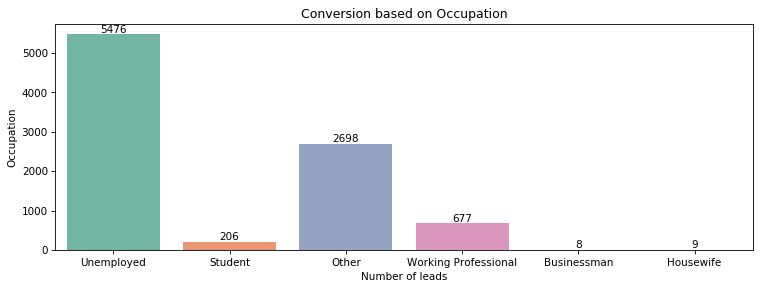

In [62]:
# Looking at columns 'Occupation' and 'Number of Leads'
plt.figure(figsize=(12,4),dpi=75)
ax = sns.countplot(data=leaddf,x='What is your current occupation',palette='Set2')
plt.title('Conversion based on Occupation')
plt.xlabel('Number of leads')
plt.ylabel('Occupation')
create_label(ax,'integer')
plt.show()

Observation - From the above plot we can infer that the conversion rate is highest for leads having occupation as working professional. Also the maximum number of converted leads are unemployed.

In [63]:
# Looking at column 'Lead Origin'
leaddf['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

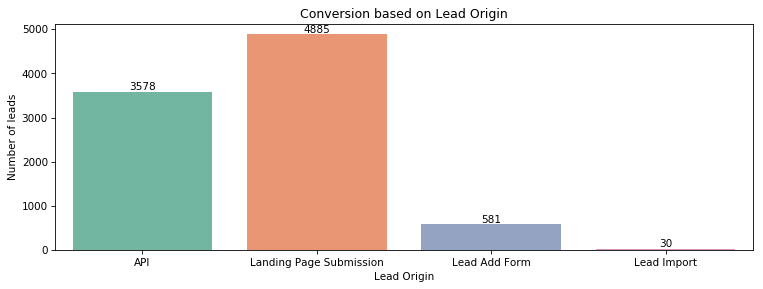

In [64]:
# Looking at columns 'Occupation' and 'Number of Leads'
plt.figure(figsize=(12,4),dpi=75)
ax = sns.countplot(data=leaddf,x='Lead Origin',palette='Set2')
plt.title('Conversion based on Lead Origin')
plt.ylabel('Number of leads')
plt.xlabel('Lead Origin')
create_label(ax,'integer')
plt.show()


Observation - From the above plot it can be observed that lead origin has impact on the conversion rate. The highest conversion rate is for origin as lead add form.

In [65]:
# Looking at column 'Lead Source'
leaddf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [66]:
# Grouping columns 'Lead Source' and 'Converted' for better understanding on impact
leaddf.groupby(['Lead Source','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Lead Source,Converted,Count
2,Direct Traffic,0,1725
6,Google,0,1721
10,Olark Chat,0,1305
7,Google,1,1147
3,Direct Traffic,1,818
12,Organic Search,0,718
11,Olark Chat,1,448
13,Organic Search,1,436
17,Reference,1,410
24,Welingak Website,1,127


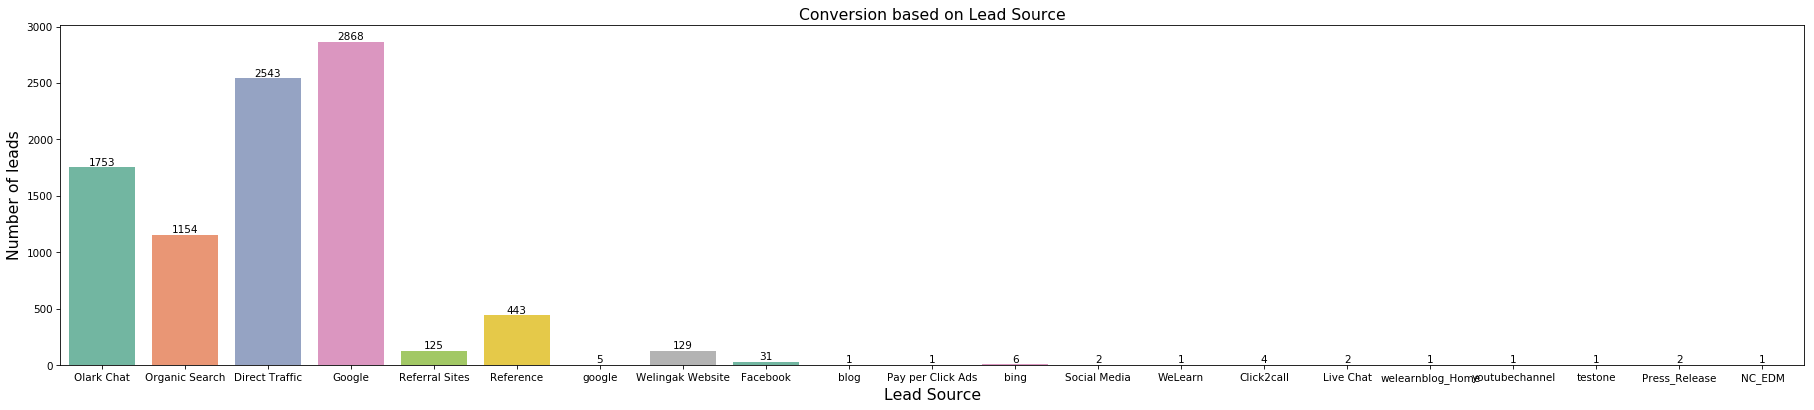

In [67]:
# Looking at columns 'Lead Source' and 'Number of Leads'
plt.figure(figsize=(30,6),dpi=75)
ax = sns.countplot(data=leaddf,x='Lead Source',palette='Set2')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.ylabel('Number of leads',fontsize=15)
plt.xlabel('Lead Source',fontsize=15)
create_label(ax,'integer')
plt.show()

Observation - From the above plot we can see that the conversion count is highest for source as google. The conversion rate is also highest for source google.

In [68]:
# Looking at column 'Last Activity'
leaddf['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [69]:
# Grouping columns 'Last Activity' and 'Converted' for better understanding on impact
leaddf.groupby(['Last Activity','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values(['Converted','Count'],ascending=[False,False]).head(10)

,Last Activity,Converted,Count
21,SMS Sent,1,1705
9,Email Opened,1,1250
18,Page Visited on Website,1,151
16,Olark Chat Conversation,1,84
6,Email Link Clicked,1,73
2,Converted to Lead,1,54
23,Unreachable,1,29
12,Form Submitted on Website,1,28
14,Had a Phone Conversation,1,20
4,Email Bounced,1,16


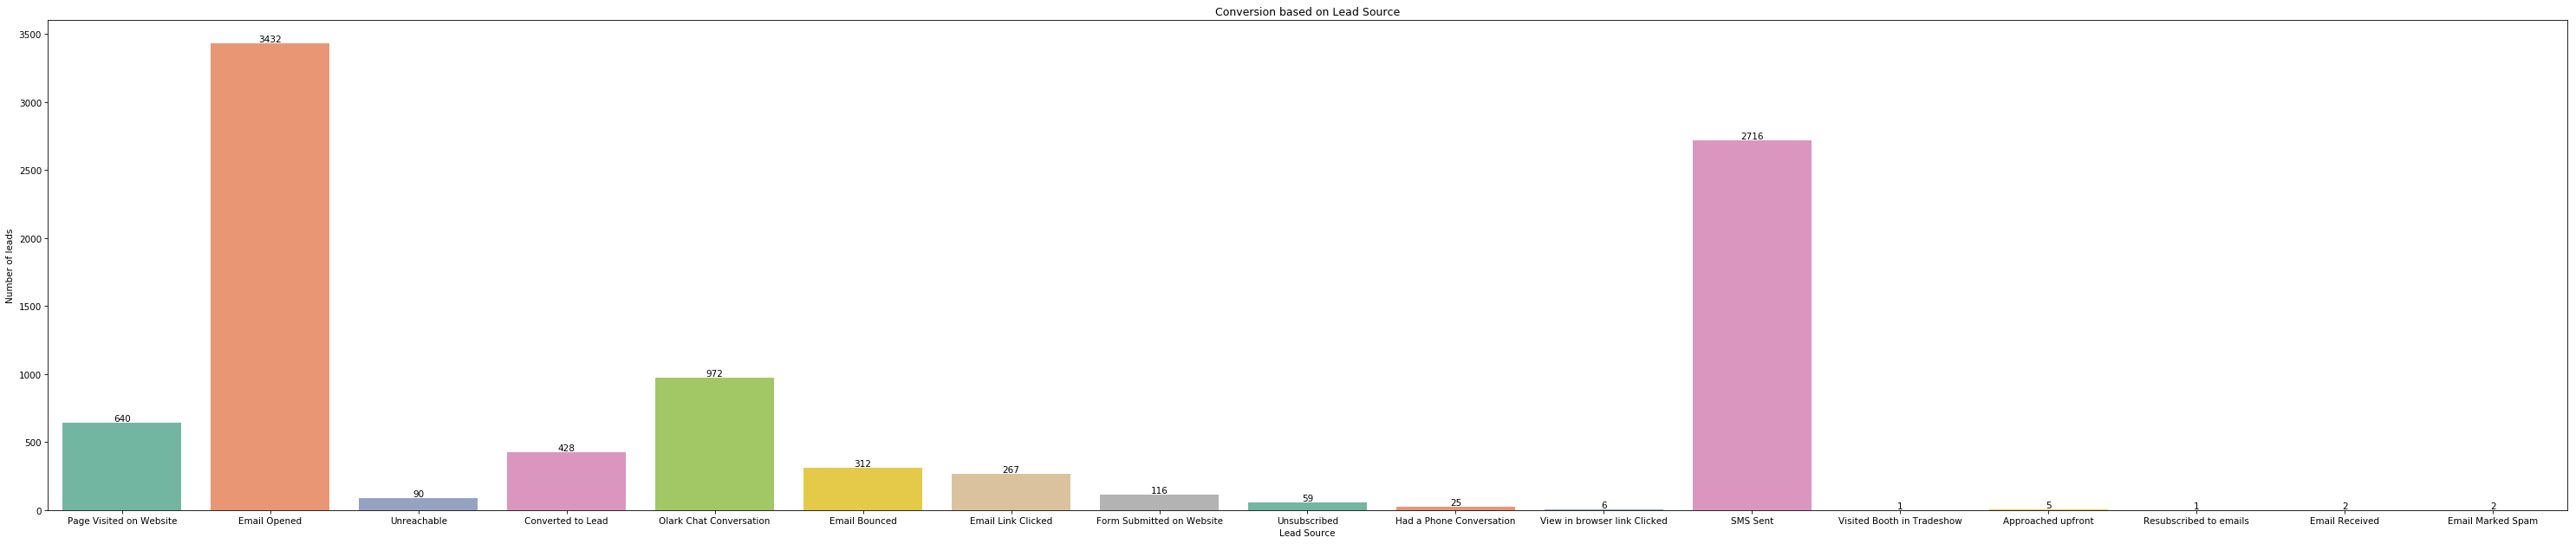

In [70]:
# Looking at columns 'Lead Source' and 'Number of Leads'
plt.figure(figsize=(50,10),dpi=75)
ax = sns.countplot(data=leaddf,x='Last Activity',palette='Set2')
plt.title('Conversion based on Lead Source')
plt.ylabel('Number of leads')
plt.xlabel('Lead Source')
create_label(ax,'integer')
plt.show()

Observation - From the above table and plot we can see that the conversion is highest for last activity SMS Sent.

In [71]:
# Looking at column 'Do Not Emal'
leaddf['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

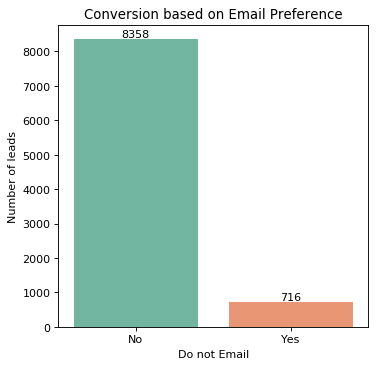

In [72]:
# Looking at columns 'Do Not Email' and 'Number of Leads'
plt.figure(figsize=(5,5),dpi=80)
ax = sns.countplot(data=leaddf,x='Do Not Email',palette='Set2')
plt.title('Conversion based on Email Preference')
plt.ylabel('Number of leads')
plt.xlabel('Do not Email')
create_label(ax,'integer')
plt.show()

Observation - It can be observed from above plot that leads who have chosen to be notified by email about the courses are more likely to convert into a hot lead.

In [73]:
leaddf['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [74]:
leaddf['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [75]:
leaddf['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [76]:
leaddf['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [77]:
leaddf['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [78]:

leaddf['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [79]:

leaddf['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [80]:
# Now as we can see from the above value counts, the columns are highly skewed towards one value, hence we'll drop these columns
columns_to_drop = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
leaddf = leaddf.drop(columns_to_drop,axis=1)
leaddf.shape

(9074, 11)

In [81]:
#Looking at column 'A free copy of Mastering The Interview'
leaddf['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

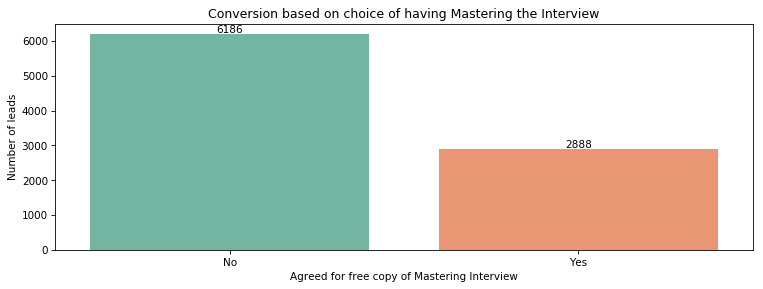

In [82]:
# Plotting columns 'A free copy of Mastering The Interview' and 'Number of Leads'
plt.figure(figsize=(12,4),dpi=75)
ax = sns.countplot(data=leaddf,x='A free copy of Mastering The Interview',palette='Set2')
plt.title('Conversion based on choice of having Mastering the Interview')
plt.ylabel('Number of leads')
plt.xlabel('Agreed for free copy of Mastering Interview')
create_label(ax,'integer')
plt.show()

In [83]:
# Looking at column 'Last Notable Activity'
leaddf['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

## OUTLIERS
#### Next step in our analysis would be to  check and treat Outliers

In [84]:
# Checking for outliers in the continuous variables
leaddf.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


Observation - It can be seen from the above table that outliers exists for columns 'TotalVisits' and 'Page Views Per Visit' since there is a huge change between 99 percentile and maximum value.

In [85]:
# Checking the percentage of missing values
round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [86]:
# Looking at datatypes
leaddf.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

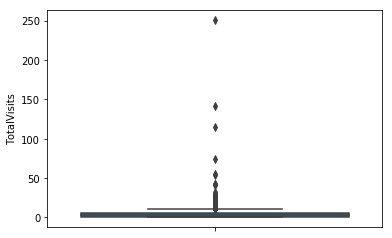

In [87]:
# Using boxplot to visualize 'Total Visits' column
sns.boxplot(y=leaddf['TotalVisits'])

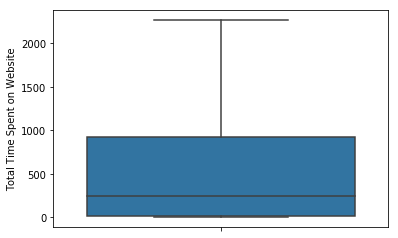

In [88]:
# Using boxplot to visualize 'Total Time Spent on Website' column
sns.boxplot(y=leaddf['Total Time Spent on Website'])

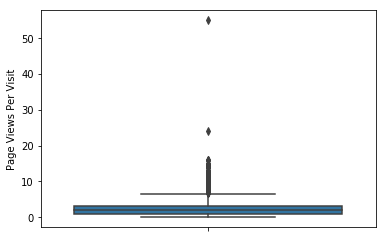

In [89]:
# Using boxplot to visualize 'Page Views Per Visit' column
sns.boxplot(y=leaddf['Page Views Per Visit'])

## Treating outliers

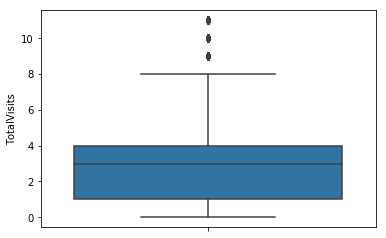

In [90]:
#Outlier removal using Interquarantile Range
Q1 = leaddf.TotalVisits.quantile(0.25)
Q3 = leaddf.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
leaddf = leaddf[(leaddf.TotalVisits >= Q1 - 1.5*IQR) & (leaddf.TotalVisits <= Q3 + 1.5*IQR)]
sns.boxplot(y=leaddf['TotalVisits'])

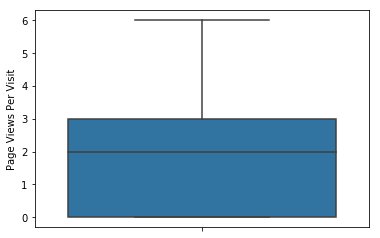

In [91]:
Q1 = leaddf['Page Views Per Visit'].quantile(0.25)
Q3 = leaddf['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leaddf = leaddf[(leaddf['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leaddf['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
sns.boxplot(y=leaddf['Page Views Per Visit'])

In [92]:
leaddf.shape

(8513, 11)

In [93]:
# Percentage of data retained
leaddf.shape[0]/9240*100

92.13203463203463

#### Next step in our exercise would be to Prepare the data by creating dummy variables and mapping categorical values to numbers

In [94]:
leaddf.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [95]:
# variables to map where we have only 2 in the given input file

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leaddf[varlist] = leaddf[varlist].apply(binary_map)

In [96]:
leaddf.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [97]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummydf1 = pd.get_dummies(leaddf[['Lead Origin', 'Lead Source','Last Activity','What is your current occupation',\
                                  'Last Notable Activity']], drop_first=True)

dummydf1.shape

(8513, 59)

In [98]:
# Add results to the Leads Data Frame

leaddf = pd.concat([leaddf, dummydf1], axis=1)
leaddf.shape

(8513, 70)

In [99]:
dummy_column = ['Lead Origin', 'Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
leaddf = leaddf.drop(dummy_column,1)
leaddf.shape

(8513, 65)

In [100]:
leaddf.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [101]:
# Percentage of data retained
leaddf.shape[0]/9240*100

92.13203463203463

### CORRELATION MATRIX

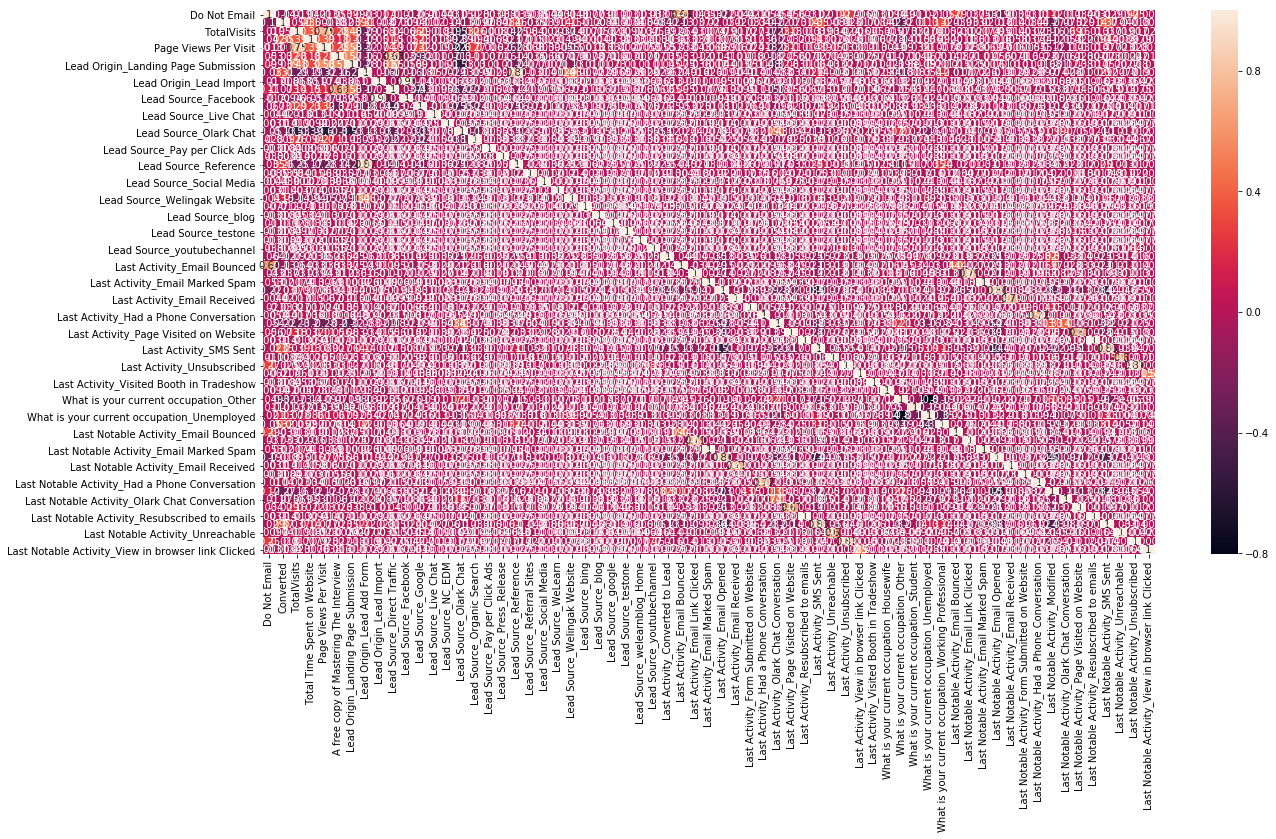

In [102]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leaddf.corr(),annot = True)
plt.show()

In [103]:
# Displaing correlation numbers
leaddf.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.137485,-0.019491,-0.041861,0.012703,0.052752,0.098540,-0.030197,-0.016852,0.114621,-0.017141,-0.066718,-0.004418,-0.003124,-0.050209,0.028385,-0.003124,0.037604,-0.035391,-0.008482,-0.004418,-0.003124,0.004286,-0.007655,-0.003124,0.011231,-0.003124,-0.003124,0.037604,-0.064046,0.639117,-0.042881,0.053184,-0.216225,-0.004418,-0.021253,-0.005435,-0.054327,0.056386,-0.003124,-0.020425,0.011417,0.268608,-0.006249,-0.003124,-0.009377,0.048736,0.011417,-0.021177,-0.050189,0.289834,-0.036778,0.053184,-0.185184,-0.003124,-0.003124,-0.010368,0.118869,-0.010650,0.034328,-0.003124,-0.028631,-0.009692,0.247199,-0.003124
Converted,-0.137485,1.000000,0.050589,0.346683,-0.000779,-0.032141,-0.038649,0.310884,-0.007995,-0.072926,-0.009401,0.031225,0.019723,0.013945,-0.127616,-0.009198,-0.008424,-0.008424,0.264230,-0.034805,0.003904,0.013945,0.154979,-0.011507,-0.008424,-0.018842,-0.008424,-0.008424,-0.008424,-0.119171,-0.128091,-0.037025,0.019723,-0.029516,0.019723,-0.033114,0.044432,-0.215801,-0.073283,0.013945,0.347235,-0.008914,-0.025168,-0.016852,-0.008424,0.041855,-0.320428,-0.009982,0.129547,0.316488,-0.038631,-0.033162,0.019723,-0.018472,0.013945,-0.008424,0.039530,-0.267493,-0.075014,-0.028917,0.013945,0.369782,0.039692,-0.017762,-0.008424
TotalVisits,-0.019491,0.050589,1.000000,0.386331,0.752129,0.276090,0.475852,-0.293263,-0.067733,0.144003,-0.065637,0.289198,-0.017759,0.018612,-0.528352,0.257900,0.000801,0.014160,-0.253243,0.084458,-0.002015,-0.003651,-0.137189,-0.007128,0.005254,0.027686,0.009707,-0.003651,0.005254,-0.091627,-0.063825,-0.031172,0.007431,0.078667,0.016877,0.026832,0.017296,-0.232161,0.184855,-0.012557,0.038981,0.034232,0.024413,0.006056,0.005254,-0.005020,-0.072748,-0.031951,0.078347,0.000516,-0.003131,-0.019849,0.007431,0.094567,0.014160,-0.003651,0.022809,-0.159520,-0.068531,0.157395,-0.012557,0.037165,0.019055,0.016840,0.023065
Total Time Spent on Website,-0.041861,0.346683,0.386331,1.000000,0.390166

## TRAIN - TEST
#### Next we'll create Test-Train Split for model building


In [104]:
# Putting feature variable to X

X = leaddf.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [105]:
y = leaddf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [107]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5123,0,-1.153092,-0.867873,-1.253080,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6322,0,-0.743258,0.108309,-0.648118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3644,0,1.305912,-0.842280,0.561805,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3011,0,0.896078,-0.451076,0.259325,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8140,0,-0.743258,-0.767330,-0.648118,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5123,0,-1.153092,-0.867873,-1.253080,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6322,0,-0.743258,0.108309,-0.648118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3644,0,1.305912,-0.842280,0.561805,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3011,0,0.896078,-0.451076,0.259325,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8140,0,-0.743258,-0.767330,-0.648118,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Executing Train Model 

In [110]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5902
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        18:53:04   Pearson chi2:                 6.57e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.683e+15    9.7e+07   2.77e+07      0.000    2.68e+15    2.68e+15
Do Not Email                                         -1.823e+14   4.82e+06  -3.78e+07      0.000   -1.82e+14   -1.82e+14
TotalVisits                                           7.475e+12   1.44e+06    5.2e+06      0.000    7.48e+12    7.48e+12
Total Time Spent on Website                            7.52e+14   1.02e+06   7.37e+08      0.000    7.52e+14    7.52e+14
Page Views Per Visit                                 -7.574e+13    1.6e+06  -4.72e+07      0.000   -7.57e+13   -7.57e+13
A free copy of Mastering The Interview               -8.349e+12   2.79e+06     -3e+06      0.000   -8.35e+12   -8.35e+12
Lead Origin_Landing Page Submission                   4.284e+14   2.85e+06    1.5e+08      0.000    4.28e+14    4.28e+14
Lead Origin_Lead Add Form                             2.605e+14   4.75e+07   5.48e+06      0.000     2.6e+14     2.6e+14
Lead Origin_Lead Import                               3.203e+15   6.92e+07   4.63e+07      0.000     3.2e+15     3.2e+15
Lead Source_Direct Traffic                           -6.363e+14   6.14e+07  -1.04e+07      0.000   -6.36e+14   -6.36e+14
Lead Source_Facebook                                 -4.108e+15   9.11e+07  -4.51e+07      0.000   -4.11e+15   -4.11e+15
Lead Source_Google                                   -3.581e+14   6.13e+07  -5.84e+06      0.000   -3.58e+14   -3.58e+14
Lead Source_Live Chat                                 3.846e+15   7.75e+07   4.96e+07      0.000    3.85e+15    3.85e+15
Lead Source_NC_EDM                                    3.492e+15    9.1e+07   3.84e+07      0.000    3.49e+15    3.49e+15
Lead Source_Olark Chat                               -9.046e+14   6.14e+07  -1.47e+07      0.000   -9.05e+14   -9.05e+14
Lead Source_Organic Search                           -4.845e+14   6.14e+07  -7.89e+06      0.000   -4.85e+14   -4.85e+14
Lead Source_Pay per Click Ads                        -3.593e+15    9.1e+07  -3.95e+07      0.000   -3.59e+15   -3.59e+15
Lead Source_Press_Release                               75.8199   2.03e-06   3.73e+07      0.000      75.820      75.820
Lead Source_Reference                                 1.004e+15    3.9e+07   2.57e+07      0.000       1e+15       1e+15
Lead Source_Referral Sites                           -6.093e+14   6.19e+07  -9.85e+06      0.000   -6.09e+14   -6.09e+14
Lead Source_Social Media                              4.741e+15    9.1e+07   5.21e+07      0.000    4.74e+15    4.74e+15
Lead Source_WeLearn                                  -1.233e+15    9.1e+07  -1.36e+07      0.000   -1.23e+15   -1.23e+15
Lead Source_Welingak Website                          1.138e+15   3.95e+07   2.88e+07      0.000    1.14e+15    1.14e+15
Lead Source_bing

## Feature Selection Using RFE


In [111]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [112]:
#Support variable
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False])

In [113]:
#Reviewing the ranking of variables from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_blog', False, 36),
 ('Lead Source_google', False, 21),
 ('

In [114]:
#Columns to consider for further analysis
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [115]:
#Map train columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_

### Assessing the model with StatsModels

In [116]:
#Add constraint and fit
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2383.3
Date:                Mon, 26 Aug 2019   Deviance:                       4766.7
Time:                        18:53:12   Pearson chi2:                 5.80e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0027      0.063    -15.835      0.000      -1.127      -0.879
Do Not Email                                            -1.5775      0.196     -8.064      0.000      -1.961      -1.194
Total Time Spent on Website                              1.1049      0.042     26.153      0.000       1.022       1.188
Lead Origin_Lead Add Form                                2.1426      0.947      2.262      0.024       0.286       3.999
Lead Source_Olark Chat                                   1.4403      0.110     13.128      0.000       1.225       1.655
Lead Source_Reference                                    1.6039      0.972      1.651      0.099      -0.300       3.508
Lead Source_Welingak Website                             4.0332      1.384      2.913      0.004       1.320       6.747
Last Activity_Had a Phone Conversation                   3.3623      1.375      2.445      0.014       0.667       6.058
Last Activity_Olark Chat Conversation                   -1.1431      0.178     -6.420      0.000      -1.492      -0.794
Last Activity_SMS Sent                                   1.2994      0.079     16.412      0.000       1.144       1.455
What is your current occupation_Housewife               22.7046   1.78e+04      0.001      0.999   -3.48e+04    3.49e+04
What is your current occupation_Other                   -1.1761      0.090    -13.058      0.000      -1.353      -1.000
What is your current occupation_Working Professional     2.5132      0.197     12.772      0.000       2.128       2.899
Last Notable Activity_Modified                          -0.6980      0.084     -8.341      0.000      -0.862      -0.534
Last Notable Activity_Unreachable                        1.7616      0.598      2.948      0.003       0.590       2.933
Last Notable Activity_Unsubscribed                       1.4191      0.512      2.769      0.006       0.415       2.423
========================================================================================================================
"""

In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.083527
6322    0.170651
3644    0.067151
3011    0.099834
8140    0.072528
1339    0.888406
211     0.783308
661     0.743855
2120    0.083527
475     0.856313
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0835274 , 0.17065144, 0.06715085, 0.09983409, 0.07252793,
       0.88840636, 0.78330774, 0.74385454, 0.0835274 , 0.85631295])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities


In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score,Lead_Number
0,0,0.083527,5123
1,0,0.170651,6322
2,0,0.067151,3644
3,0,0.099834,3011
4,0,0.072528,8140


#### Creating new column 'Predicted' with 1 if Conversion Probability >= 0.5 else 0

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID
0,0,0.083527,5123
1,0,0.170651,6322
2,0,0.067151,3644
3,0,0.099834,3011
4,0,0.072528,8140


In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Probability,LeadID,Predicted
0,0,0.083527,5123,0
1,0,0.170651,6322,0
2,0,0.067151,3644,0
3,0,0.099834,3011,0
4,0,0.072528,8140,0
5,1,0.888406,1339,1
6,1,0.783308,211,1
7,1,0.743855,661,1
8,0,0.083527,2120,0
9,1,0.856313,475,1


In [122]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8135593220338984


Drop the column having ** p-value > 0.05 **

## Checking VIFs

Variance Inflation Factor(VIF), to observe how much the feature variables are correlated with each other. 

These variables having VIF with favaorable limit.But there variables having P-Value like
'What is your current occupation_Housewife','LeadProfile_Dual Specialization Student'
So let's start by dropping that.

Drop the column having ** p-value > 0.05 **

In [123]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2387.7
Date:                Mon, 26 Aug 2019   Deviance:                       4775.5
Time:                        18:53:25   Pearson chi2:                 5.81e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9974      0.063    -15.775      0.000      -1.121      -0.874
Do Not Email                                            -1.5816      0.196     -8.086      0.000      -1.965      -1.198
Total Time Spent on Website                              1.1057      0.042     26.182      0.000       1.023       1.188
Lead Origin_Lead Add Form                                2.1376      0.947      2.257      0.024       0.282       3.994
Lead Source_Olark Chat                                   1.4379      0.110     13.114      0.000       1.223       1.653
Lead Source_Reference                                    1.6222      0.971      1.671      0.095      -0.281       3.525
Lead Source_Welingak Website                             4.0343      1.384      2.915      0.004       1.322       6.747
Last Activity_Had a Phone Conversation                   3.3549      1.375      2.439      0.015       0.659       6.051
Last Activity_Olark Chat Conversation                   -1.1495      0.178     -6.457      0.000      -1.498      -0.801
Last Activity_SMS Sent                                   1.2942      0.079     16.356      0.000       1.139       1.449
What is your current occupation_Other                   -1.1803      0.090    -13.110      0.000      -1.357      -1.004
What is your current occupation_Working Professional     2.5072      0.197     12.744      0.000       2.122       2.893
Last Notable Activity_Modified                          -0.6917      0.084     -8.280      0.000      -0.855      -0.528
Last Notable Activity_Unreachable                        1.7582      0.598      2.941      0.003       0.586       2.930
Last Notable Activity_Unsubscribed                       1.4191      0.512      2.769      0.006       0.415       2.424
========================================================================================================================
"""

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,67.71
4,Lead Source_Reference,52.97
5,Lead Source_Welingak Website,15.85
3,Lead Source_Olark Chat,1.74
7,Last Activity_Olark Chat Conversation,1.62
11,Last Notable Activity_Modified,1.56
9,What is your current occupation_Other,1.42
1,Total Time Spent on Website,1.29
8,Last Activity_SMS Sent,1.26
0,Do Not Email,1.18


#### Dropping the column Lead Source_Reference since it is having p-value > 0.05 as well as high vif

In [127]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.9
Date:                Mon, 26 Aug 2019   Deviance:                       4777.9
Time:                        18:53:33   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9979      0.063    -15.786      0.000      -1.122      -0.874
Do Not Email                                            -1.5784      0.195     -8.083      0.000      -1.961      -1.196
Total Time Spent on Website                              1.1052      0.042     26.171      0.000       1.022       1.188
Lead Origin_Lead Add Form                                3.6946      0.227     16.304      0.000       3.250       4.139
Lead Source_Olark Chat                                   1.4364      0.110     13.094      0.000       1.221       1.651
Lead Source_Welingak Website                             2.4763      1.034      2.396      0.017       0.450       4.502
Last Activity_Had a Phone Conversation                   3.3549      1.374      2.441      0.015       0.662       6.048
Last Activity_Olark Chat Conversation                   -1.1486      0.178     -6.453      0.000      -1.497      -0.800
Last Activity_SMS Sent                                   1.2953      0.079     16.376      0.000       1.140       1.450
What is your current occupation_Other                   -1.1800      0.090    -13.107      0.000      -1.356      -1.004
What is your current occupation_Working Professional     2.5096      0.197     12.764      0.000       2.124       2.895
Last Notable Activity_Modified                          -0.6910      0.083     -8.277      0.000      -0.855      -0.527
Last Notable Activity_Unreachable                        1.7599      0.598      2.945      0.003       0.589       2.931
Last Notable Activity_Unsubscribed                       1.4167      0.512      2.765      0.006       0.413       2.421
========================================================================================================================
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.74
6,Last Activity_Olark Chat Conversation,1.62
10,Last Notable Activity_Modified,1.56
2,Lead Origin_Lead Add Form,1.54
8,What is your current occupation_Other,1.42
4,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.29
7,Last Activity_SMS Sent,1.26
0,Do Not Email,1.18
9,What is your current occupation_Working Profes...,1.17


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [130]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.083803
6322    0.172325
3644    0.067871
3011    0.100880
8140    0.073304
1339    0.888532
211     0.785455
661     0.744881
2120    0.083803
475     0.850367
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08380296, 0.17232535, 0.06787148, 0.10088001, 0.07330351,
       0.88853246, 0.78545464, 0.74488063, 0.08380296, 0.85036691])

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID
0,0,0.083803,5123
1,0,0.172325,6322
2,0,0.067871,3644
3,0,0.100880,3011
4,0,0.073304,8140


In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,predicted
0,0,0.083803,5123,0
1,0,0.172325,6322,0
2,0,0.067871,3644,0
3,0,0.100880,3011,0
4,0,0.073304,8140,0


In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3286  420]
 [ 695 1558]]


In [135]:
# Actual/Predicted     not_conv    conv
        # not_conv       3286       420
        # conv           695       1558  

In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8128880684678638


It can be seen that the accuracy hasn't dropped much.

####   Metrics for  sensitivity and specificity

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6915224145583666

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.8866702644360497

In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8254207485556393


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.85      3706
           1       0.79      0.69      0.74      2253

   micro avg       0.81      0.81      0.81      5959
   macro avg       0.81      0.79      0.80      5959
weighted avg       0.81      0.81      0.81      5959



So it can be seen that with a cutoff value of 0.5 the precision is coming as 79% , recall  69% and accuracy 81%. We will check the metrics for different cutoff values in later part of the notebook and will arrive at a proper cutoff value.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

In [144]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2922747505265529

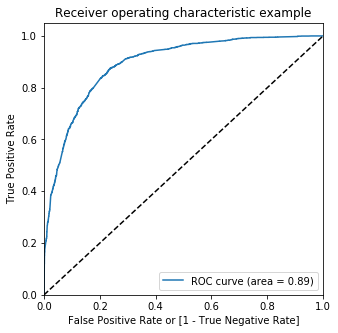

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

Finding Optimal Cutoff Point
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.644739  0.972037  0.445764
0.2   0.2  0.767075  0.922326  0.672693
0.3   0.3  0.805336  0.869951  0.766055
0.4   0.4  0.816412  0.778961  0.839180
0.5   0.5  0.812888  0.691522  0.886670
0.6   0.6  0.804665  0.617843  0.918241
0.7   0.7  0.778990  0.505104  0.945494
0.8   0.8  0.758181  0.414115  0.967350
0.9   0.9  0.716395  0.269419  0.988127


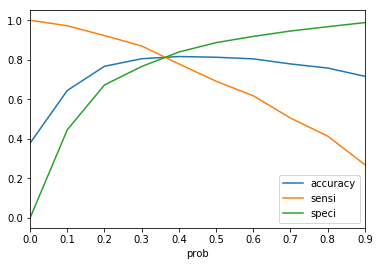

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Let's take the cutoff as 0.55 and check the metrics 

In [151]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head(10)

,Converted,Conversion_Probability,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098674274207082

In [153]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3359,  347],
       [ 786, 1467]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6511318242343542

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9063680518078792

In [157]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09363194819212088


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8087100330760749


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8103739445114596


In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3706
           1       0.81      0.65      0.72      2253

   micro avg       0.81      0.81      0.81      5959
   macro avg       0.81      0.78      0.79      5959
weighted avg       0.81      0.81      0.80      5959



## Precision and Recall

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8087100330760749

In [163]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6511318242343542

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

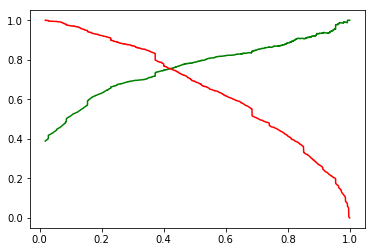

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Hence with cutoff value 0.55 we can see that we are getting a good model with accuracy 81% , precision 81% and recall 65%. We will try to increase the recall a little bit. But before that let's check how the metrics are coming for the test dataset with this cutoff and model.

## Predictions on Test Data Frame

In [167]:
X_test_copy = X_test.copy()

In [168]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
7358,0,-0.175247,0,0,0,0,0,0,0,0,1,0,0
8398,0,2.613513,0,0,0,0,0,0,0,0,1,0,0
3472,0,-0.578193,0,0,0,0,0,0,1,0,0,0,0
8673,0,0.709359,0,0,0,0,0,0,1,0,0,0,0
8053,0,1.535867,0,0,0,0,0,1,0,0,0,0,0


In [169]:
#X_test.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [170]:
X_test_sm = sm.add_constant(X_test)

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

7358    0.132087
8398    0.768451
3472    0.056414
8673    0.198781
8053    0.880260
6385    0.177801
5396    0.128474
7152    0.083734
7013    0.538824
7903    0.154251
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Let's see the head
y_pred_1.head()

,0
7358,0.132087
8398,0.768451
3472,0.056414
8673,0.198781
8053,0.880260


In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [176]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [177]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [179]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7358,0.132087
1,0,8398,0.768451
2,0,3472,0.056414
3,1,8673,0.198781
4,1,8053,0.880260


In [180]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})

In [181]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Probability'], axis=1)

In [182]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Probability
0,7358,0,0.132087
1,8398,0,0.768451
2,3472,0,0.056414
3,8673,1,0.198781
4,8053,1,0.880260


In [183]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.55 else 0)

In [184]:
y_pred_final.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8218480814408771

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1457,  144],
       [ 311,  642]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6736621196222455

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.910056214865709

In [190]:
# Precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816793893129771

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1601
           1       0.82      0.67      0.74       953

   micro avg       0.82      0.82      0.82      2554
   macro avg       0.82      0.79      0.80      2554
weighted avg       0.82      0.82      0.82      2554



             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1601
          1       0.82      0.67      0.74       953

avg / total       0.82      0.82      0.82      2554

So with the model that we built, it is having a good fitting on the test set also. Accuracy is 82% , Precision 82% and recall 67%. This was when we took the cutoff as 0.55. Now we will slightly vary the cutoff to get a precision of around 80% and slightly increase the value of recall.

## Cut Off : 0.51
## Train Set 

In [192]:
train1=y_train_pred_final.copy()

In [193]:
train1['final_predicted'] = train1.Conversion_Probability.map( lambda x: 1 if x > 0.51 else 0)

train1.head(10)

,Converted,Conversion_Probability,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [194]:
# Let's check the overall accuracy.
metrics.accuracy_score(train1.Converted, train1.final_predicted)

0.8128880684678638

In [195]:
confusion2 = metrics.confusion_matrix(train1.Converted, train1.final_predicted )
confusion2

array([[3303,  403],
       [ 712, 1541]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.683976919662672

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.8912574203993524

In [199]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1087425796006476


In [200]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7926954732510288


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8226650062266501


In [202]:
# Precision and Recall
print("Precision : {}".format(precision_score(train1.Converted, train1.final_predicted)))
print("Recall : {}".format(recall_score(train1.Converted, train1.final_predicted)))

Precision : 0.7926954732510288
Recall : 0.683976919662672


In [203]:
from sklearn.metrics import classification_report
print(classification_report(train1.Converted, train1.final_predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      3706
           1       0.79      0.68      0.73      2253

   micro avg       0.81      0.81      0.81      5959
   macro avg       0.81      0.79      0.79      5959
weighted avg       0.81      0.81      0.81      5959



### Precision = 0.79, Recall = 0.68 and Accuracy = 0.81 

### Test Set 

In [204]:
test1 = y_pred_final.copy()
test1.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [205]:
test1['final_predicted'] = test1.Conversion_Probability.map(lambda x: 1 if x > 0.51 else 0)

In [206]:
# Let's check the overall accuracy.
metrics.accuracy_score(test1.Converted, test1.final_predicted)

0.8202819107282694

In [207]:
confusion2 = metrics.confusion_matrix(test1.Converted, test1.final_predicted )
confusion2

array([[1427,  174],
       [ 285,  668]], dtype=int64)

In [208]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7009443861490031

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

0.891317926296065

In [211]:
# Precision and Recall
print("Precision : {}".format(precision_score(test1.Converted, test1.final_predicted)))
print("Recall : {}".format(recall_score(test1.Converted, test1.final_predicted)))

Precision : 0.7933491686460807
Recall : 0.7009443861490031


In [212]:
from sklearn.metrics import classification_report
print(classification_report(test1.Converted, test1.final_predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1601
           1       0.79      0.70      0.74       953

   micro avg       0.82      0.82      0.82      2554
   macro avg       0.81      0.80      0.80      2554
weighted avg       0.82      0.82      0.82      2554



** Precision = 0.79, Recall = 0.70 and Accuracy = 0.81 **

### Cut Off : 0.52

### Train Set 

In [213]:
train2=y_train_pred_final.copy()

In [214]:
train2['final_predicted'] = train2.Conversion_Probability.map( lambda x: 1 if x > 0.52 else 0)

train2.head(10)

,Converted,Conversion_Probability,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [215]:
# Let's check the overall accuracy.
metrics.accuracy_score(train2.Converted, train2.final_predicted)

0.8122168149018292

In [216]:
confusion2 = metrics.confusion_matrix(train2.Converted, train2.final_predicted )
confusion2

array([[3313,  393],
       [ 726, 1527]], dtype=int64)

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.677762982689747

In [219]:
# Let us calculate specificity
TN / float(TN+FP)

0.8939557474365893

In [220]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10604425256341068


In [221]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7953125


In [222]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8202525377568705


In [223]:
# Precision and Recall
print("Precision : {}".format(precision_score(train2.Converted, train2.final_predicted)))
print("Recall : {}".format(recall_score(train2.Converted, train2.final_predicted)))

Precision : 0.7953125
Recall : 0.677762982689747


In [224]:
from sklearn.metrics import classification_report
print(classification_report(train2.Converted, train2.final_predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      3706
           1       0.80      0.68      0.73      2253

   micro avg       0.81      0.81      0.81      5959
   macro avg       0.81      0.79      0.79      5959
weighted avg       0.81      0.81      0.81      5959



### Precision = 0.80, Recall = 0.68 and Accuracy = 0.81

### Test Set 

In [225]:
test2 = y_pred_final.copy()
test2.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [226]:
test2['final_predicted'] = test2.Conversion_Probability.map(lambda x: 1 if x > 0.52 else 0)

In [227]:
# Let's check the overall accuracy.
metrics.accuracy_score(test2.Converted, test2.final_predicted)

0.8206734534064213

In [228]:
confusion2 = metrics.confusion_matrix(test2.Converted, test2.final_predicted )
confusion2

array([[1434,  167],
       [ 291,  662]], dtype=int64)

In [229]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [230]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6946484784889821

In [231]:
# Let us calculate specificity
TN / float(TN+FP)

0.8956901936289818

In [232]:
# Precision and Recall
print("Precision : {}".format(precision_score(test2.Converted, test2.final_predicted)))
print("Recall : {}".format(recall_score(test2.Converted, test2.final_predicted)))

Precision : 0.7985524728588661
Recall : 0.6946484784889821


In [233]:
from sklearn.metrics import classification_report
print(classification_report(test2.Converted, test2.final_predicted))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1601
           1       0.80      0.69      0.74       953

   micro avg       0.82      0.82      0.82      2554
   macro avg       0.81      0.80      0.80      2554
weighted avg       0.82      0.82      0.82      2554



### Precision = 0.80, Recall = 0.69 and Accuracy = 0.82

** Hence we can see that with a cutoff value of 0.52 we are getting fairly good results on both train and test set. So we can settle with this cutoff for our prediction model **

Metrics with cutoff value : 0.52 <br>

<table style="width:50%">
  <tr>
    <th>Metric</th>
    <th>Train</th> 
    <th>Test</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.81</td> 
    <td>0.82</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.80</td> 
    <td>0.80</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.68</td> 
    <td>0.69</td>
  </tr>
</table>

### Calculate Lead Score on Train and Test Data 


#### Train Data

In [234]:
# Inspecting final predicted train dataframe
y_train_predicted_final = train2
y_train_predicted_final.head()

,Converted,Conversion_Probability,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [235]:
# Selecting only required columns
y_train_lead_score = y_train_predicted_final[['LeadID','Converted','Conversion_Probability','final_predicted']]
y_train_lead_score.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,5123,0,0.083803,0
1,6322,0,0.172325,0
2,3644,0,0.067871,0
3,3011,0,0.100880,0
4,8140,0,0.073304,0


In [236]:
# Calculate lead score
y_train_lead_score['Lead Score'] = y_train_lead_score['Conversion_Probability'] * 100
y_train_lead_score.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead Score
0,5123,0,0.083803,0,8.380296
1,6322,0,0.172325,0,17.232535
2,3644,0,0.067871,0,6.787148
3,3011,0,0.100880,0,10.088001
4,8140,0,0.073304,0,7.330351


#### Test Data

In [237]:
# Inspecting final predicted test dataframe
y_test_predicted_final = test2
y_test_predicted_final.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [238]:
y_test_lead_score = y_test_predicted_final

# Calculate lead score
y_test_lead_score['Lead Score'] = y_test_lead_score['Conversion_Probability'] * 100
y_test_lead_score.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead Score
0,7358,0,0.132087,0,13.208701
1,8398,0,0.768451,1,76.845129
2,3472,0,0.056414,0,5.641410
3,8673,1,0.198781,0,19.878136
4,8053,1,0.880260,1,88.026043


** Merge Train and Test data to get lead scores for the complete dataset **

In [239]:
print(y_train_lead_score.shape)
print(y_test_lead_score.shape)

(5959, 5)
(2554, 5)


In [240]:
LeadScore = pd.concat([y_train_lead_score,y_test_lead_score],axis=0,join='outer')
LeadScore.shape

(8513, 5)

In [241]:
LeadScore

,LeadID,Converted,Conversion_Probability,final_predicted,Lead Score
0,5123,0,0.083803,0,8.380296
1,6322,0,0.172325,0,17.232535
2,3644,0,0.067871,0,6.787148
3,3011,0,0.100880,0,10.088001
4,8140,0,0.073304,0,7.330351
5,1339,1,0.888532,1,88.853246
6,211,1,0.785455,1,78.545464
7,661,1,0.744881,1,74.488063
8,2120,0,0.083803,0,8.380296
9,475,1,0.850367,1,85.036691


### So the Lead Score Analysis is been Completed

#### Let us check the summary of the final model to get the coefficients of the various variables.

In [243]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.9
Date:                Mon, 26 Aug 2019   Deviance:                       4777.9
Time:                        19:26:06   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9979      0.063    -15.786      0.000      -1.122      -0.874
Do Not Email                                            -1.5784      0.195     -8.083      0.000      -1.961      -1.196
Total Time Spent on Website                              1.1052      0.042     26.171      0.000       1.022       1.188
Lead Origin_Lead Add Form                                3.6946      0.227     16.304      0.000       3.250       4.139
Lead Source_Olark Chat                                   1.4364      0.110     13.094      0.000       1.221       1.651
Lead Source_Welingak Website                             2.4763      1.034      2.396      0.017       0.450       4.502
Last Activity_Had a Phone Conversation                   3.3549      1.374      2.441      0.015       0.662       6.048
Last Activity_Olark Chat Conversation                   -1.1486      0.178     -6.453      0.000      -1.497      -0.800
Last Activity_SMS Sent                                   1.2953      0.079     16.376      0.000       1.140       1.450
What is your current occupation_Other                   -1.1800      0.090    -13.107      0.000      -1.356      -1.004
What is your current occupation_Working Professional     2.5096      0.197     12.764      0.000       2.124       2.895
Last Notable Activity_Modified                          -0.6910      0.083     -8.277      0.000      -0.855      -0.527
Last Notable Activity_Unreachable                        1.7599      0.598      2.945      0.003       0.589       2.931
Last Notable Activity_Unsubscribed                       1.4167      0.512      2.765      0.006       0.413       2.421
========================================================================================================================
"""

#### So from the above summary we can conclude that the top three variables which contribute most towards the probability of a lead getting converted are : ** Lead Origin , Last Activity and Current Occupation of the lead **

